## librerias a utilizar

In [1]:
import os
from astropy.io import fits

import matplotlib.pylab as plt
from astropy.visualization import ImageNormalize, ZScaleInterval

#WCS para mapear el pixel a la coordenada en la esfera celeste.
from astropy.wcs import WCS

In [14]:
datapath = 'F:/Practica/Imagenes/TrES1'

In [15]:
os.path.join(datapath, 'tfn0m410-kb98-20211004-0036-e91.fits.fz')

'F:/Practica/Imagenes/TrES1\\tfn0m410-kb98-20211004-0036-e91.fits.fz'

In [16]:
image_dat = fits.getdata( os.path.join(datapath, 'tfn0m410-kb98-20211004-0036-e91.fits.fz') )

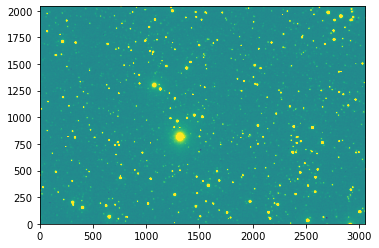

In [17]:
interval = ZScaleInterval()
norm = ImageNormalize( image_dat, interval=ZScaleInterval() )

plt.imshow( image_dat, norm=norm, origin='lower' )

In [18]:
image_header = fits.getheader( os.path.join(datapath, 'tfn0m410-kb98-20211004-0036-e91.fits.fz'), ext=1 )

In [19]:
image_header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3054                                                  
NAXIS2  =                 2042                                                  
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
XTENSION= 'BINTABLE'           / binary table extension                         
ZDITHER0=                  623 / dithering offset when quantizing floats        
DATADICV= 'LCOGT-DIC.FITS-0.11.0' / Version number of the data dictionary       
HDRVER  = 'LCOGT-HDR-1.4.0'    / Version number of the headers                  
ORIGIN  = 'LCOGT   '           / Organization responsible for the data          
SITEID  = 'tfn     '        

In [20]:
help(WCS)

Help on class WCS in module astropy.wcs.wcs:

class WCS(astropy.wcs.wcsapi.fitswcs.FITSWCSAPIMixin, astropy.wcs.WCSBase)
 |  WCS(header=None, fobj=None, key=' ', minerr=0.0, relax=True, naxis=None, keysel=None, colsel=None, fix=True, translate_units='', _do_set=True)
 |  
 |  WCS objects perform standard WCS transformations, and correct for
 |  `SIP`_ and `distortion paper`_ table-lookup transformations, based
 |  on the WCS keywords and supplementary data read from a FITS file.
 |  
 |  See also: https://docs.astropy.org/en/stable/wcs/
 |  
 |  Parameters
 |  ----------
 |  header : `~astropy.io.fits.Header`, `~astropy.io.fits.hdu.image.PrimaryHDU`, `~astropy.io.fits.hdu.image.ImageHDU`, str, dict-like, or None, optional
 |      If *header* is not provided or None, the object will be
 |      initialized to default values.
 |  
 |  fobj : `~astropy.io.fits.HDUList`, optional
 |      It is needed when header keywords point to a `distortion
 |      paper`_ lookup table stored in a differ

In [21]:
sistema_coord = WCS(image_header)

Set OBSGEO-B to    28.300308 from OBSGEO-[XYZ].
Set OBSGEO-H to     2386.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [22]:
sistema_coord

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 286.04410459  36.6315962767  
CRPIX : 1527.5  1021.5  
CD1_1 CD1_2  : -1.83320713718e-07  0.000158504479934  
CD2_1 CD2_2  : -0.000158504479934  -1.83320713718e-07  
NAXIS : 3054  2042

In [23]:
# Queremos saber las coordenadas en ascension recta (RA), declinacion (DEC) del pixel 1000,1500

coord_cielo = sistema_coord.pixel_to_world(1000,1500)

In [24]:
coord_cielo

<SkyCoord (ICRS): (ra, dec) in deg
    (286.13903649, 36.71492323)>

In [25]:
coord_cielo.to_string('hmsdms')

'19h04m33.36875693s +36d42m53.72364497s'

In [26]:
# Tres-1 coordinates: 19 04 09.8516024106 +36 37 57.445911611 
from astropy import units as u
from astropy.coordinates import SkyCoord

tres1_coord = SkyCoord( '19h04m09s +36d37m57s' )

In [27]:
tres1_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (286.0375, 36.6325)>

In [28]:
y, x = sistema_coord.world_to_pixel(tres1_coord)

In [29]:
print(x,y)

987.0556197158203 1520.835967523029


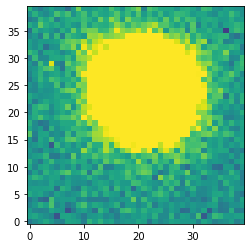

In [30]:
interval = ZScaleInterval()
norm = ImageNormalize( image_dat, interval=ZScaleInterval() )

plt.imshow( image_dat[980:1020,1500:1540], norm=norm, origin='lower' )

(0.0, 400.0)

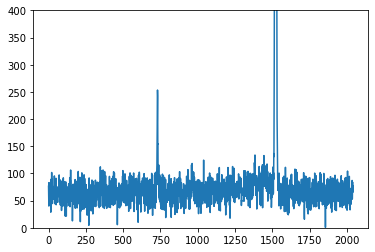

In [31]:
plt.plot(image_dat[1005,0:2040])
plt.ylim(0,400)